## Test des paramètres à 10_000 items

In [6]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou_numpy_solver as tbns
from tools.tabou_numpy_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *

# Chargement des fichiers

sad1 = parser.loadFromFile("Data/pi-12-10000-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-10000-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-10000-1000-001.kna")

# Récupérations des résultats optimaux

solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("\nles solutions optimales sont")
print("\tsad 1 :",sol_opti1,"pour",sad1.name)
print("\tsad 2 :",sol_opti2,"pour",sad2.name)
print("\tsad 3 :",sol_opti3,"pour",sad3.name)

loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 435klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 409klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 120klines/s]



les solutions optimales sont
	sad 1 : 45105 pour pi-12-10000-1000-001.kna
	sad 2 : 64077 pour pi-13-10000-1000-001.kna
	sad 3 : 50622 pour pi-15-10000-1000-001.kna


### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   overflow_cost : si =1, 1kg en trop == 1 point de fitness en moins, 2 pour 2 etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [6]:
#la seed par défaut est 1

iter_max = 4500
tabu_size = 500
overflow_cost = 3.0#on est sur d'être au delà du ratio max
init_size = 0.01#les capa sont entre 35k et 49k, donc on peut mettre entre 350 et 490 kg au départ, plusieurs items 

group_size = 10 #nombre de tests de chaque paramètres dans une éxecutions.
#sur les graphiques seront affichés le max, le min et l'élément central

#### Test taille TABU

calcul: 100%|██████████| 11/11 [00:33<00:00,  3.04s/batch]


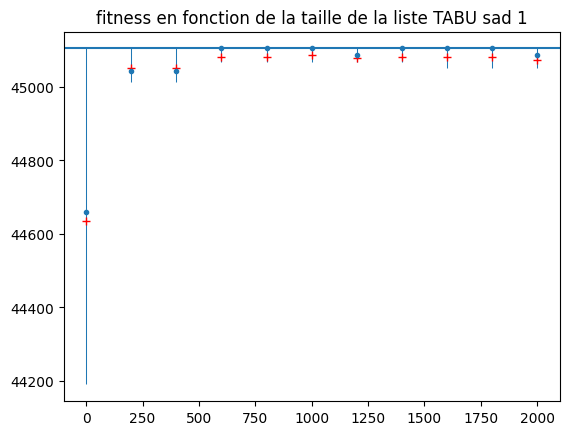

calcul: 100%|██████████| 11/11 [00:34<00:00,  3.16s/batch]


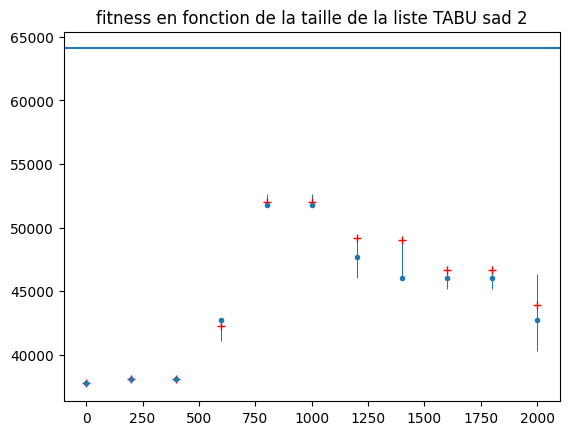

calcul: 100%|██████████| 11/11 [00:39<00:00,  3.57s/batch]


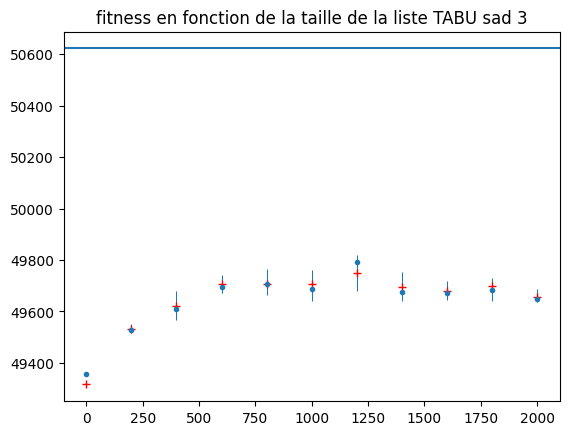

In [ ]:
(variateur,title) = variateur_tabou_numpy.liste_tabou2()

iterateur = range(2000,-1,-200)#on commence par les calculs les plus lourds (même si ça change pas grand chose)

test = Testor(tbns.tabou_numpy_solver(sad1,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbns.tabou_numpy_solver(sad2,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbns.tabou_numpy_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(iterateur,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 3")

calcul: 100%|██████████| 9/9 [00:30<00:00,  3.42s/batch]


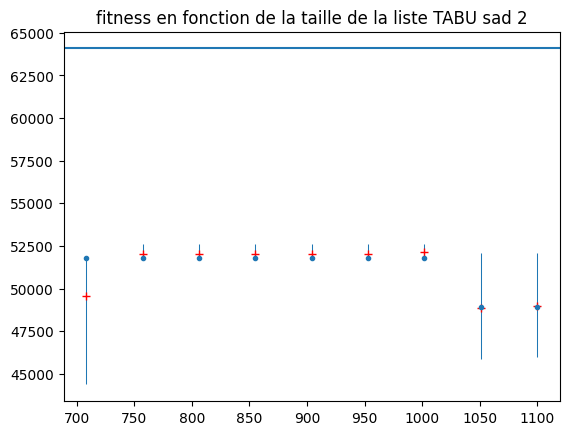

calcul: 100%|██████████| 12/12 [00:43<00:00,  3.61s/batch]


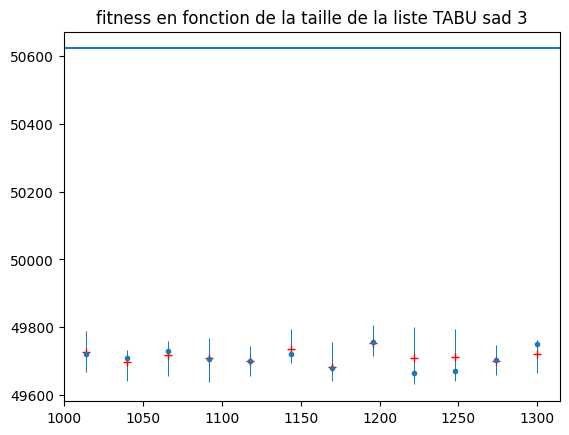

In [10]:
#affinage
(variateur,title) = variateur_tabou_numpy.liste_tabou2()



test = Testor(tbns.tabou_numpy_solver(sad2,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(1100,700,-49),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbns.tabou_numpy_solver(sad3,iter_max,tabu_size,overflow_cost,init_size))
testResult = test.test(range(1300,1000,-26),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour le premier sac à dos : entre 650 et 1000

Pour le second : entre 750 et 1000 c'est le mieux.

Pour le troisième : il y a un pic autour de 1200, mais pas de breaucoup

In [7]:
tabu_size_1 = 800
tabu_size_2 = 900
tabu_size_3 = 1200

group_size = 5

calcul: 100%|██████████| 13/13 [00:14<00:00,  1.15s/batch]


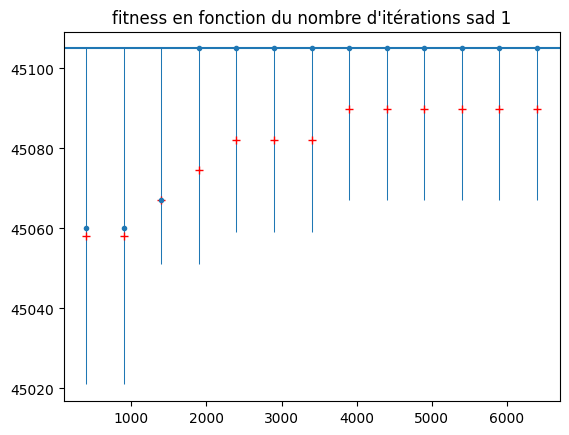

calcul: 100%|██████████| 13/13 [00:16<00:00,  1.25s/batch]


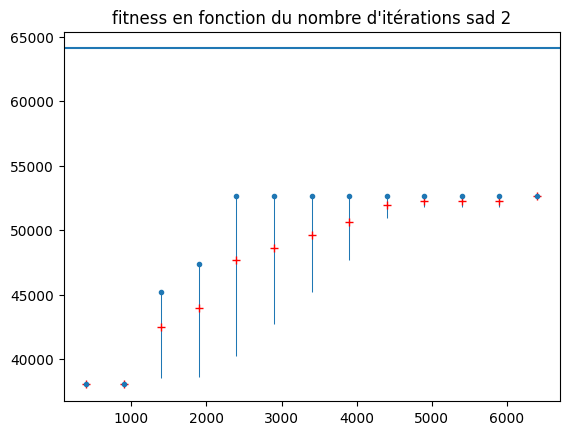

calcul: 100%|██████████| 13/13 [00:18<00:00,  1.42s/batch]


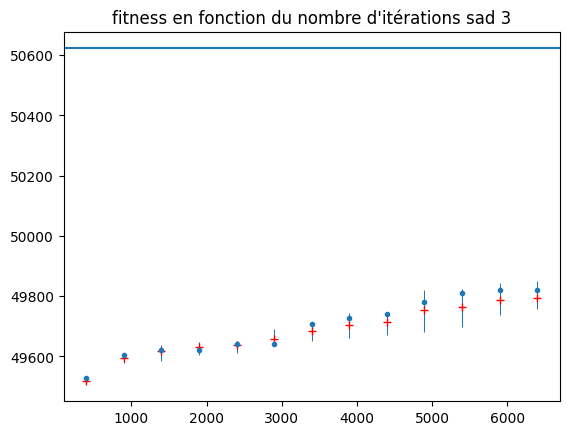

In [13]:
(variateur,title) = variateur_tabou_numpy.nombre_iterations()
it = range(6400,0,-500)
solver = tbns.tabou_numpy_solver(sad1,iter_max,tabu_size_1,overflow_cost,init_size)
testResult = Testor(solver).test(it,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbns.tabou_numpy_solver(sad2,iter_max,tabu_size_2,overflow_cost,init_size))
testResult = test.test(it,variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbns.tabou_numpy_solver(sad3,iter_max,tabu_size_3,overflow_cost,init_size))
testResult = test.test(it,variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour tous : plus il y a d'itération, mieux ça semble être. On règlera ce paramètre plus tard pour voir ce qu'on peut faire pour garder le tout en temps limité.


## Le comptage négatif du poids supplémentaire

In [8]:
iter_max1 = 4500
iter_max2 = 4500
iter_max3 = 6000#plus c'est trop long

calcul: 100%|██████████| 14/14 [00:24<00:00,  1.76s/batch]


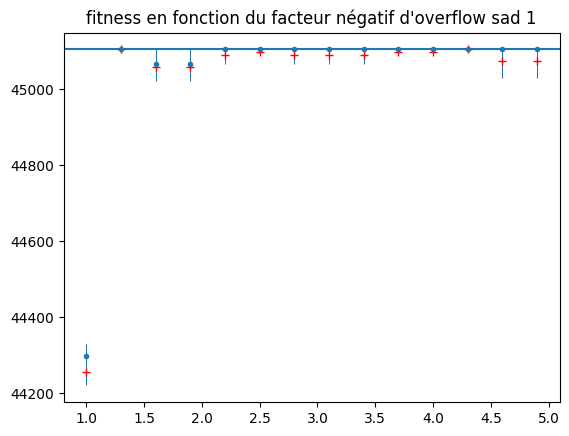

calcul: 100%|██████████| 14/14 [00:21<00:00,  1.52s/batch]


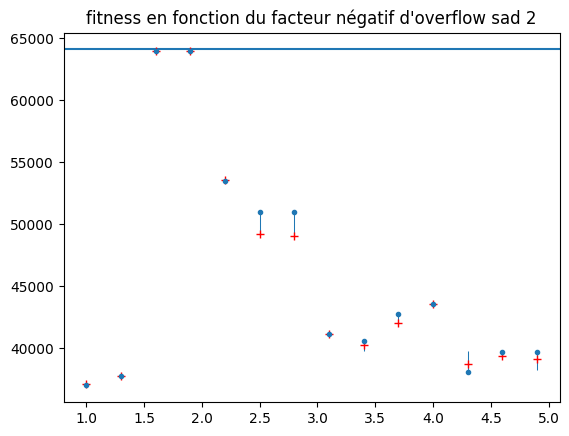

calcul: 100%|██████████| 14/14 [00:32<00:00,  2.32s/batch]


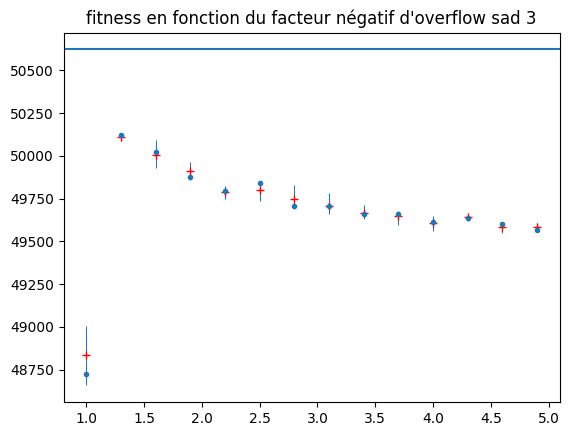

In [15]:
iter = floatRange(1,5,0.3)

(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()

solver = tbns.tabou_numpy_solver(sad1,iter_max1,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbns.tabou_numpy_solver(sad2,iter_max2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbns.tabou_numpy_solver(sad3,iter_max3,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



calcul: 100%|██████████| 16/16 [00:21<00:00,  1.37s/batch]


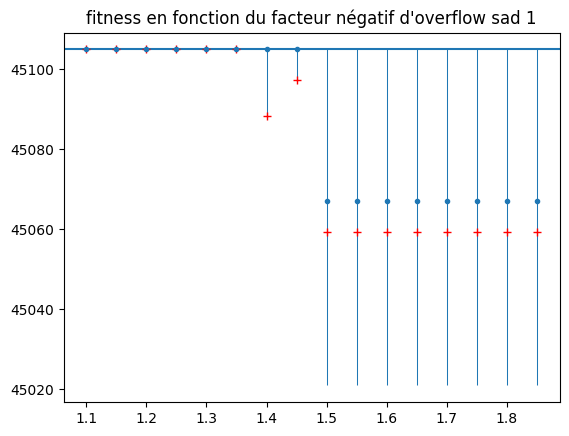

calcul: 100%|██████████| 16/16 [00:18<00:00,  1.18s/batch]


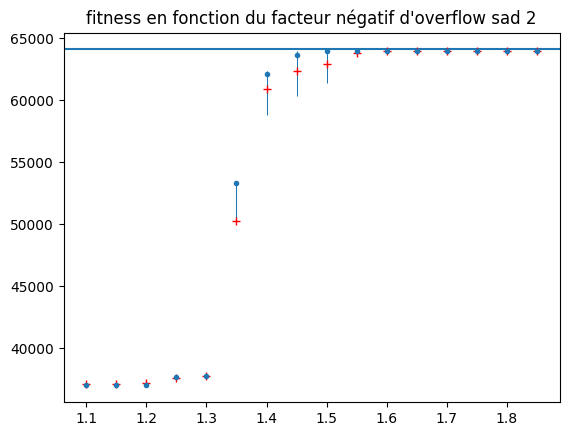

calcul: 100%|██████████| 16/16 [00:34<00:00,  2.18s/batch]


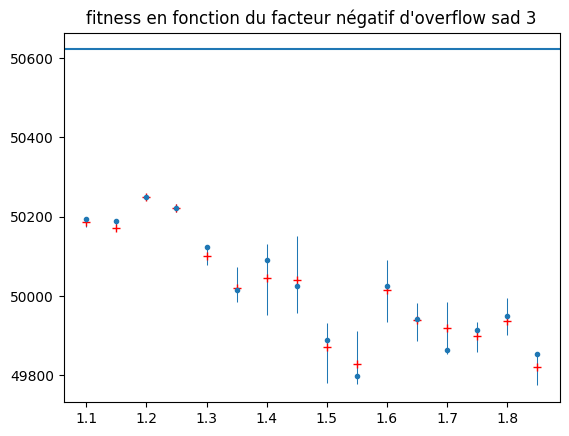

In [16]:
# zoom 
iter = floatRange(1.1,1.9,0.05)

(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()

solver = tbns.tabou_numpy_solver(sad1,iter_max1,tabu_size_1,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbns.tabou_numpy_solver(sad2,iter_max2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbns.tabou_numpy_solver(sad3,iter_max3,tabu_size_3,0,init_size)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")

sad1 : entre 1.1 et 1.35 c'est plutôt bon.

sad2 : Entre 1.6 et 1.2 c'est parfait (ou presque)

sad3 : 1.2 semble être le mieux

In [13]:
r1 = sad1.get_max_ratio()
print("ratio max 1 : ",r1, "y'en a",sad1.count_by_ratio(r1))
print("ratio moy 1 : ",sad1.get_avg_ratio())
r1 = sad2.get_max_ratio()
print("ratio max 2 : ",r1, "y'en a",sad2.count_by_ratio(r1))
print("ratio moy 2 : ",sad2.get_avg_ratio())
r1 = sad3.get_max_ratio()
print("ratio max 1 : ",r1, "y'en a",sad3.count_by_ratio(r1))
print("ratio moy 3 : ",sad3.get_avg_ratio())

overflow_cost1 = 1.3
overflow_cost2 = 1.8 #n'est pas choisie car fausse
overflow_cost2 = 2.35 #expliqué ensuite
overflow_cost3 = 1.2

ratio max 1 :  1.0 y'en a 5083
ratio moy 1 :  0.8957000000000331
ratio max 2 :  2.0526315789473686 y'en a 5035
ratio moy 2 :  1.6323711340205365
ratio max 1 :  3.0 y'en a 11
ratio moy 3 :  1.0093212921051906


## ATTENTION !
la raison pour la quelle on trouve un bonne solution sur le sac à dos 2, c'est qu'on ajoute un de ces item de bon ratio à un moment. or, comme le ratio est supérieur à notre cout d'overflow optimal, l'algo va mettre les 5000 items dans le sac... Donc on ne cherche plus vraiment la bonne solution

La raison pour laquelle les solutions trouvées par l'algorithme sont bonne, c'est que cet item est ajouté au bon moment, et qu'on tombe sur une bonne solution... Toutes les valeurs suivantes sont en overflow (et à l'infini). pour trouver la solution optimale, il faut que le ratio soit supérieur.


Pour le sac a dos 3, il y a peut-être un problème similaire... Mais comme il n'y a que 11 item avec un très bon ratio, ça doit moins poser soucis.

bon coté des choses : le meilleur ratio dans le sad 2 est 2.052, et on trouve toujours un bon résultat avec un facteur à 2.05 + 8*0.003 = 2.074
Mais c'est toujours très faible, et le sac continuera à mal fonctionner

calcul: 100%|██████████| 11/11 [00:17<00:00,  1.59s/batch]


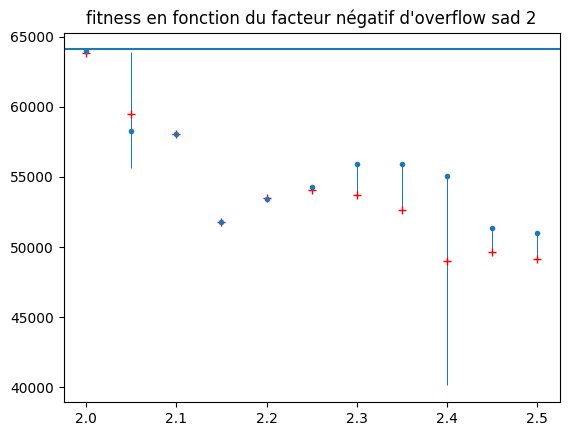

In [12]:
iter = floatRange(2,2.5,0.05)

(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()

solver = tbns.tabou_numpy_solver(sad2,iter_max2,tabu_size_2,0,init_size)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

étant donné cette courbe, on va prendre 2.35 comme valeur !
la moyenne est moins bonne que 2.3 ou 2.25, mais la médianne pllus haute. Donc ça semble mieux (car l'algo n'est pas trop long)


## variation de la taille de la solution initiale

calcul: 100%|██████████| 15/15 [00:21<00:00,  1.45s/batch]


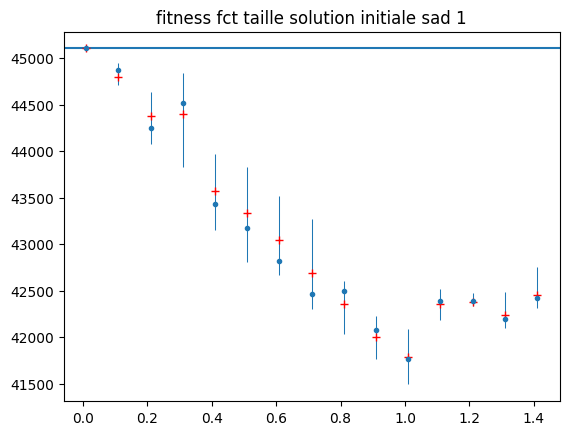

calcul: 100%|██████████| 15/15 [00:25<00:00,  1.70s/batch]


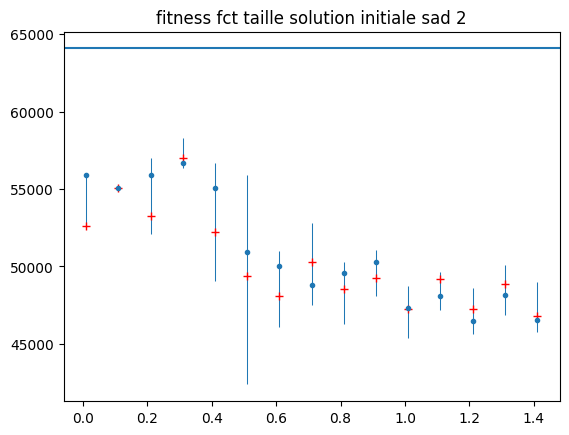

calcul: 100%|██████████| 15/15 [00:34<00:00,  2.31s/batch]


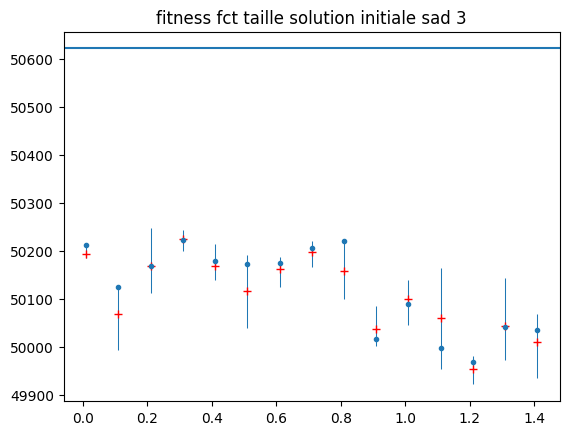

In [14]:
(variateur,title) = variateur_tabou_numpy.poids_inital()
closeIter = floatRange(0.01,1.5,0.1)
test = Testor(tbns.tabou_numpy_solver(sad1,iter_max1,tabu_size_1,overflow_cost1,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbns.tabou_numpy_solver(sad2,iter_max2,tabu_size_2,overflow_cost2,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbns.tabou_numpy_solver(sad3,iter_max3,tabu_size_3,overflow_cost3,0))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


pour le premier sac à dos, tant que le sac à dos est remplis à moins de 30% au départ, on a de bons résultats.

Pour le second, les valeurs semblent meilleures entre 0 et 0.35 (mais c'est mitigé)

Pour le troisème, le remplissage initial ne semble pas avoir beaucoup d'influence, tant qu'on est à moins de 80%

### Résultats "optimaux"

calcul: 100%|██████████| 10/10 [00:22<00:00,  2.21s/batch]


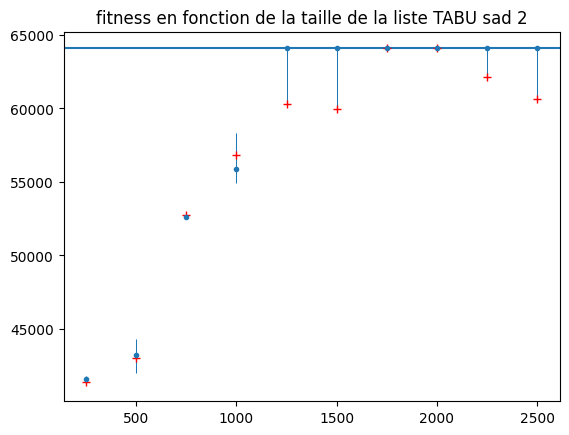

In [ ]:
#on a pas retweaké pour le 2

(var,titre) = variateur_tabou_numpy.liste_tabou2()
#on teste avec plein d'itérations pour être sur 0.3 c'est l'opti précédent
solver = tbns.tabou_numpy_solver(sad2,6010,0,overflow_cost2,0.3)
testResult = Testor(solver).test(range(2500,100,-250) ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")
#entre 1750 et 2000 on est bien
tabu_size_2 = 1800

calcul: 9batch [01:17,  8.64s/batch]                    


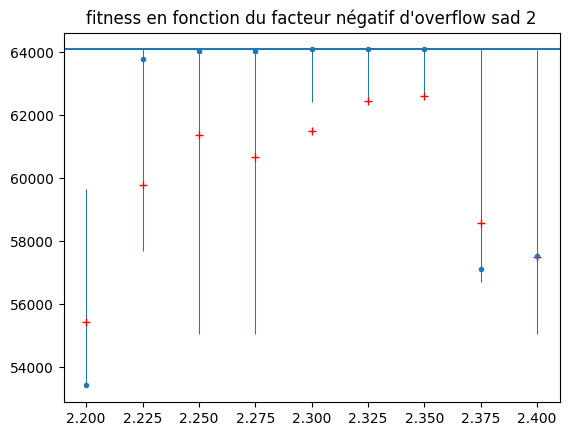

In [4]:
tabu_size_2 = 1800
(var,titre) = variateur_tabou_numpy.compte_negatif_des_points()
#on teste avec plein d'itérations pour être sur 0.3 c'est l'opti précédent
solver = tbns.tabou_numpy_solver(sad2,6010,tabu_size_2,0,0.3)
testResult = Testor(solver).test(floatRange(2.2,2.4,0.025), var,10)
graph_test_result(testResult,sol_opti2,titre + " sad 2")
#entre 1750 et 2000 on est bien


calcul: 100%|██████████| 8/8 [00:39<00:00,  4.97s/batch]


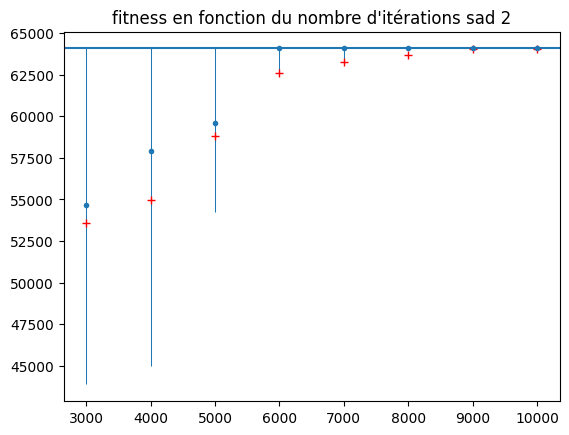

In [12]:
tabu_size_2 = 1800
overflow_cost2 = 2.35
(var,titre) = variateur_tabou_numpy.nombre_iterations()
#on teste avec plein d'itérations pour être sur 0.3 c'est l'opti précédent
solver = tbns.tabou_numpy_solver(sad2,0,tabu_size_2,overflow_cost2,0.3)
testResult = Testor(solver).test(range(10000,2000,-1000),var,10)
graph_test_result(testResult,sol_opti2,titre + " sad 2")


calcul: 100%|██████████| 8/8 [00:55<00:00,  6.97s/batch]


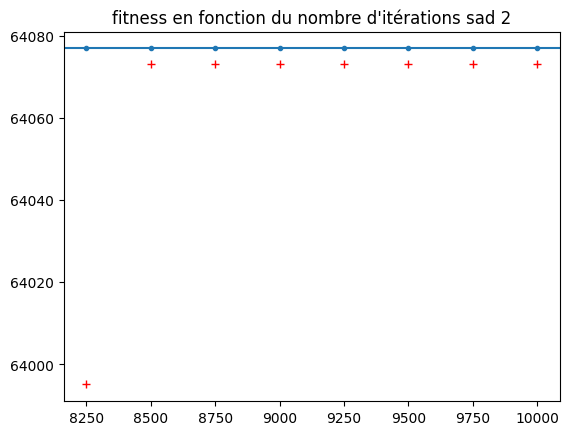

In [8]:
tabu_size_2 = 1800
overflow_cost2 = 2.35
(var,titre) = variateur_tabou_numpy.nombre_iterations()
#on teste avec plein d'itérations pour être sur 0.3 c'est l'opti précédent
solver = tbns.tabou_numpy_solver(sad2,0,tabu_size_2,overflow_cost2,0.3)
testResult = Testor(solver).test(range(10000,8000,-250),var,10)
graph_test_result(testResult,sol_opti2,titre + " sad 2")


calcul: 100%|██████████| 8/8 [00:35<00:00,  4.39s/batch]


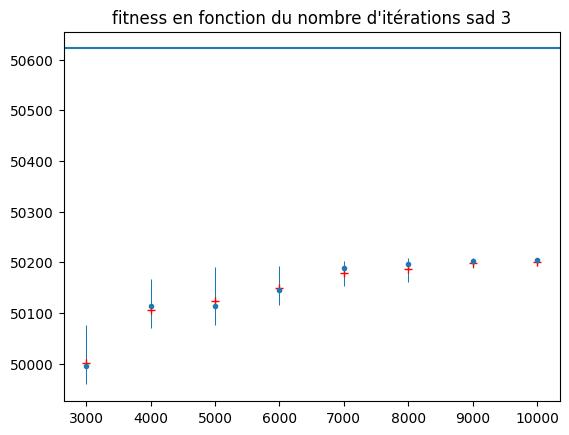

In [13]:
(var,titre) = variateur_tabou_numpy.nombre_iterations()
#on teste avec plein d'itérations pour être sur 0.3 c'est l'opti précédent
solver = tbns.tabou_numpy_solver(sad3,0,tabu_size_3,overflow_cost3,0.3)
testResult = Testor(solver).test(range(10000,2000,-1000),var,10)
graph_test_result(testResult,sol_opti3,titre + " sad 3")


In [7]:
overflow_cost1 = 1.1
overflow_cost2 = 2.35
overflow_cost3 = 1.1

iter_max1 = 2500
iter_max2 =9000#ou 8000, on y a déjà Plus de 80% de bonne réponse.
iter_max3 = 9000

taille_init1 = 0.3
taille_init2 = 0.3
taille_init3 = 0.3

tabu_size_1 = 800
tabu_size_2 = 1800
tabu_size_3 = 1000